In [1]:
import pandas as pd
import matplotlib.pyplot as plt


### Classification models
- k-nearest neighbors (knn) - today
- logistic regression
- Classification
- Random forests
- Gradient boosting
- Neural networks
- etc

### K-nearest neighbors
* When k = 4, check 4 nearest neighbors
* Say in a scatterplot there is two sets of data label 1 and label 2. If k = 4, calculate p(label=1) and p(label=2)
* For example at a certain position with k=4 there are 3 label 1s and 1 label 2s, then p(label=1) = 3/4 and p(label=2)= 1/4


Weight k-nearest neighbors
* Slightly different. P(label=1) = sum(label=1) distances / sum(label=any) distances

In [4]:
# load irish dataset
path = 'https://raw.githubusercontent.com/um-perez-alvaro/Data-Science-Practice/master/Data/iris.csv'
iris = pd.read_csv(path)
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Each row is a flower. For each flower we have 4 features and the species. Goal is to use features to predict the species

In [18]:
# feature matrix X - target vector y
# NOTE: for axis, 0 = rows, 1 = columns
X = iris.drop('species', axis=1) # 4 features
y = iris.species # species column

In [19]:
from sklearn.neighbors import KNeighborsClassifier as knn

In [20]:
# instantiate classifier
knn_clf = knn(n_neighbors=10, weights='uniform') # use uniform or distance for weights

In [21]:
# fit model to data
knn_clf.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [22]:
# apply model to new data
new_flowers= [[3,5,4,2],[5,4,3,1]] # random numbers
knn_clf.predict(new_flowers)

C:\Users\Derrick\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Iris-versicolor', 'Iris-setosa'], dtype=object)

## Toy dataset

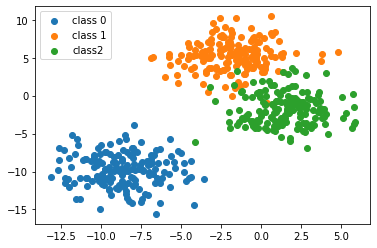

In [66]:
# load three blobs data
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=500, centers = 3, cluster_std=2)
plt.scatter(X[y==0,0],X[y==0,1], label='class 0')
plt.scatter(X[y==1,0], X[y==1,1], label='class 1')
plt.scatter(X[y==2,0],X[y==2,1], label='class2')
plt.legend()

In [67]:
knn_clf = knn(n_neighbors=10, weights='uniform')
knn_clf.fit(X,y)

KNeighborsClassifier(n_neighbors=10)

In [68]:
new_points = [[0,0], [5,0], [-7.5,6]]

In [69]:
knn_clf.predict(new_points)

array([2, 2, 1])

In [70]:
# draw classification regions function (from github repo)

# -*- coding: utf-8 -*-
"""
Created on Thu Sep 16 14:29:00 2021
Updated on Tue Oct 19 09:00:00 2021
@author: javier.perez-alvaro
"""
import matplotlib.pyplot as plt
import numpy as np
def draw_classification_regions(X,y,model):
    
    # classes 
    classes = model.classes_
    # feature names
    try:
        feature_names = X.columns
    except:
        feature_names = ['feature #1','feature #2']
    
    # put data into numpy arrays
    try:
        X = np.array(X)
        y = np.array(y).flatten()
    except:
        print('something went wrong')
    
    from matplotlib.colors import ListedColormap
    # create a mesh grid
    #h = .01
    h = 0.1
    x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
    y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # evaluate classifier at all mesh grid points
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # number of classes
    n_classes = len(np.unique(y))
    
    # map classes to 0,1,2
    for i in range(n_classes):
        Z[Z==classes[i]]=i

    # Put the result into a color plot
    fig, ax = plt.subplots(figsize=(10,5))
    colors = ['C0','C1','C2']
    if n_classes==3:
        custom_cmap = ListedColormap(['#9898ff','#fafab0','#a0faa0'])
    else:
        custom_cmap = ListedColormap(['#9898ff','#fafab0'])
        
    ax.contourf(xx, yy, Z, cmap=custom_cmap)

    # plot dataset
    for i in range(n_classes):
        ax.scatter(X[y==classes[i],0], X[y==classes[i],1], c = colors[i], label=classes[i], s=75, alpha=0.8)

    ax.set_xlabel(feature_names[0], fontsize=15)
    ax.set_ylabel(feature_names[1], fontsize=15)

    ax.legend()

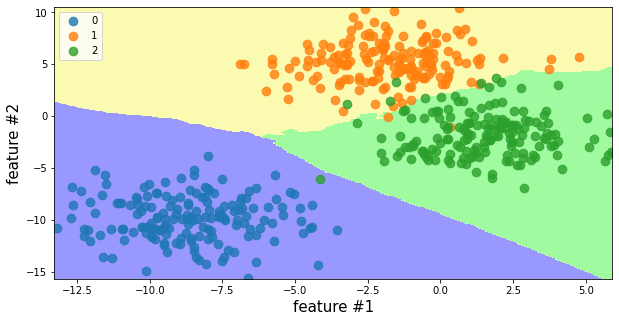

In [71]:
draw_classification_regions(X,y,knn_clf)

In [74]:
# use logistic regression
from sklearn.linear_model import LogisticRegression as logrec
logreg_clf = logrec()
logreg_clf.fit(X,y)


LogisticRegression()

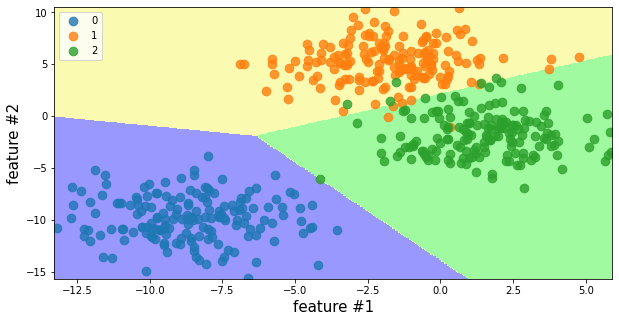

In [75]:
draw_classification_regions(X,y,logreg_clf)

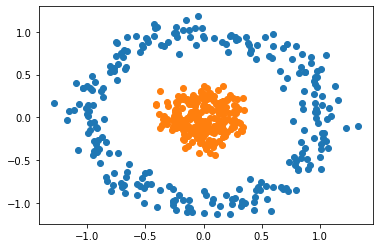

In [54]:
# two circles dataset
from sklearn.datasets import make_circles
X,y = make_circles(n_samples=500, noise=0.1, factor=0.2)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

In [55]:
knn.clf.fit(X,y)
draw_classification_regions(X,y,knn_clf)

AttributeError: type object 'KNeighborsClassifier' has no attribute 'clf'

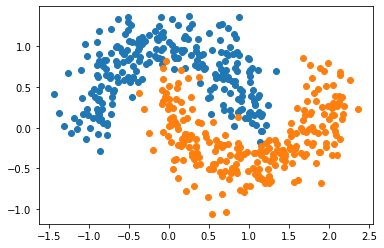

In [56]:
# two moons dataset
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=500, noise=0.2)
plt.scatter(X[y==0,0], X[y==0,1])
plt.scatter(X[y==1,0], X[y==1,1])

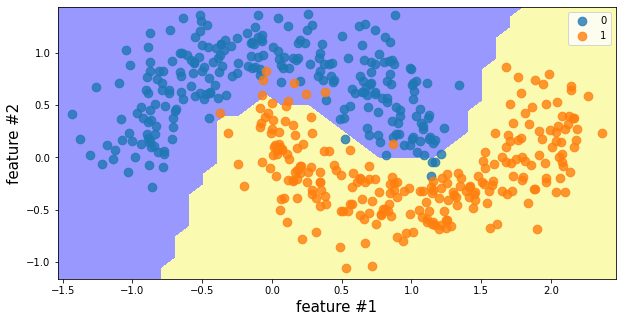

In [65]:
knn_clf = knn(n_neighbors=50)
knn_clf.fit(X,y)
draw_classification_regions(X,y,knn_clf)

## Logistic regression
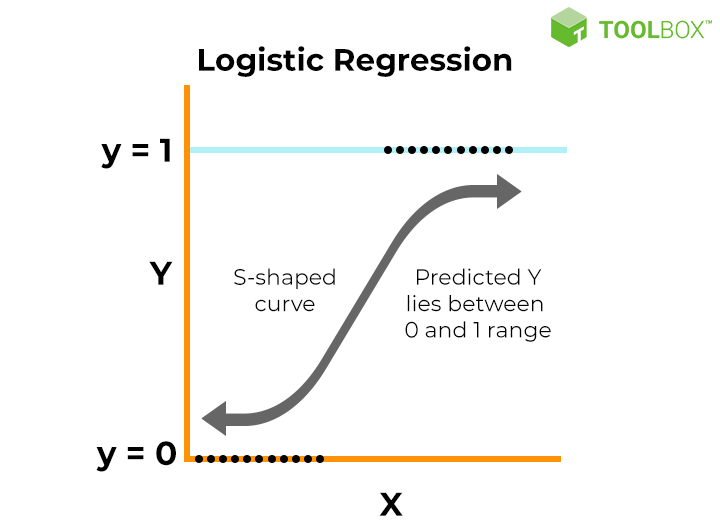